In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import copy

# Define dataset to plot here

In [2]:
datasetfile_path = "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10m/Results/dataset.pkl"

# Load dataset in memory

In [3]:
with open(datasetfile_path, "rb") as handle:
    data_dict = pickle.load(handle)

# Dataset Attributes

In [4]:
num_episodes = data_dict["num_episodes"]
episode_length = data_dict["episode-length"]
time_period = data_dict["time-period"]
print(num_episodes)
print(episode_length)

20
5500


# Agent Speed as the function of time

In [6]:
global_vel_data = {}

for density in data_dict["data"].keys():
    
    vel_data = []
    
    for episode_num in data_dict["data"][density].keys():
            
            episode_data = []
            
            for step in range(0, len(data_dict["data"][density][episode_num]["agent_vel"])):
                episode_data.append(data_dict["data"][density][episode_num]["agent_vel"][step])
            
            vel_data.append(episode_data)
    
    global_vel_data[density] = copy.deepcopy(vel_data)


Text(0, 0.5, 'agent speed, (km/hr)')

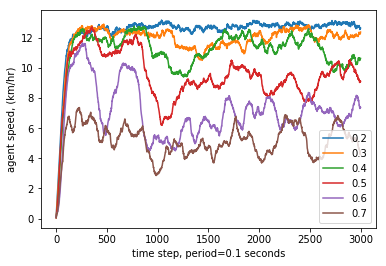

In [7]:
for density in global_vel_data.keys():
    plt.plot(global_vel_data[density].mean(axis=0) * 3.6, label=density)
plt.legend()
plt.xlabel("time step, period=%.1f seconds"%(time_period))
plt.ylabel("agent speed, (km/hr)")

# Average Speed as the function of densities

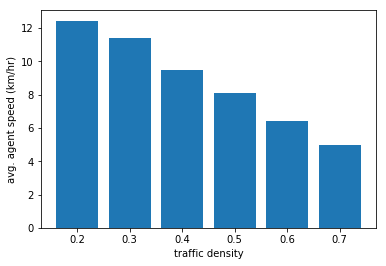

In [8]:
avg_speeds = []
densities = []

for density in global_vel_data.keys():
    densities.append(density)
    
    speed_sum = 0.0
    elements_count = 0
    for episode in global_vel_data[density]:
        for vel in episode:
            speed_sum += vel
            elements_count += 1
    
    avg_speeds.append((speed_sum/elements_count) * 3.6)

plt.bar(np.arange(len(densities)), avg_speeds)
plt.xticks(np.arange(len(densities)), densities)

plt.xlabel("traffic density")
plt.ylabel("avg. agent speed (km/hr)")
plt.show()

In [11]:
print(avg_speeds)

[12.446297008033763, 11.417813125968555, 9.498130960157729, 8.112635317876025, 6.424125692778512, 4.9684768144419795]


# Average Reward

In [9]:
avg_rewards = []
densities = []

for density in data_dict["data"].keys():
    densities.append(density)
    
    cum_reward_sum = 0.0
    elements_count = 0
    
    for episode in data_dict["data"][density]:
        cum_reward_sum += data_dict["data"][density][episode]["cum_reward"]
    avg_rewards.append(cum_reward_sum/num_episodes)

Text(0, 0.5, 'avg. reward')

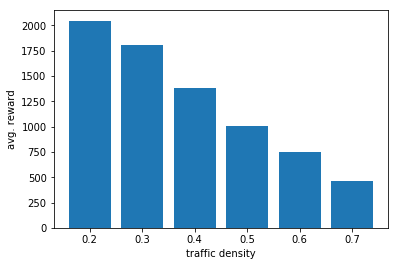

In [10]:
plt.bar(np.arange(len(densities)), avg_rewards)
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("avg. reward")

# Action Distribution

In [11]:
possible_actions = {}
for element in set(data_dict["data"][0.2][0]["planner_actions"]):
    possible_actions[element] = 0

action_distribution = {}
for density in data_dict["data"].keys():
    action_distribution[density] = copy.deepcopy(possible_actions)
    
    for episode_num in data_dict["data"][density]:
        for step in range(0, episode_length):
            action_distribution[density][data_dict["data"][density][episode_num]["planner_actions"][step]] += 1

In [12]:
action_distribution

{0.2: {'dec': 15766, 'do-nothing': 66637, 'acc': 37597},
 0.3: {'dec': 17537, 'do-nothing': 64966, 'acc': 37497},
 0.4: {'dec': 19933, 'do-nothing': 60713, 'acc': 39354},
 0.5: {'dec': 26159, 'do-nothing': 55542, 'acc': 38299},
 0.6: {'dec': 31914, 'do-nothing': 46966, 'acc': 41120},
 0.7: {'dec': 37789, 'do-nothing': 43521, 'acc': 38690}}

In [13]:
for density in action_distribution.keys():
    
    total = 0
    for act in action_distribution[density].keys():
        total += action_distribution[density][act]
    
    assert total == (num_episodes * episode_length)

for density in action_distribution.keys():
    for action in action_distribution[density].keys():
        action_distribution[density][action] /= (num_episodes * episode_length)

In [14]:
plots = []
order = []

for action in action_distribution[0.2].keys():
    act_list = []
    order.append(action)
    for density in action_distribution.keys():
        act_list.append(action_distribution[density][action])
    
    plots.append(act_list)
    

In [15]:
order

['dec', 'do-nothing', 'acc']

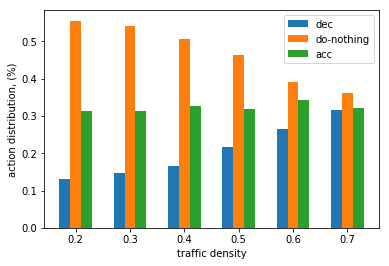

In [16]:
width = - 0.2

plt.bar(np.arange(len(densities)) - 0.2, plots[0], width=width, label="dec")
plt.bar(np.arange(len(densities)), plots[1], width=width, label="do-nothing")
plt.bar(np.arange(len(densities)) + 0.2, plots[2], width=width, label="acc")
plt.xticks(np.arange(len(densities)), densities)
plt.xlabel("traffic density")
plt.ylabel("action distribution, (%)")
plt.legend()
plt.show()